# Ejercicio

Repetir el ejercicio pero sin normalizar la entrada y exploren el resultado

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


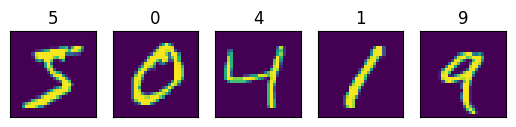

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import normalize

X,y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)

# EJERCICIO: quitar la siguiente línea:
# X = normalize(X)

import matplotlib.pyplot as plt

imagenes_mostrar = X.reshape([-1,28,28])[:5]
labels_mostrar = y[:5]
for i, (img,label) in enumerate(zip(imagenes_mostrar,labels_mostrar)):
    plt.subplot(151 + i) #esto es para que las ponga lado a lado, se interpreta cada dígito (1: renglon, 5:columnas, x: el indice en el que se va poniendo)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(label)

In [2]:
import tensorflow as tf

### Preparación de Dataset

In [3]:
# Separación del dataset
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [4]:
X_train = tf.constant(X_train,dtype=tf.float32)
X_test = tf.constant(X_test,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

### Modelo Multicapa

In [5]:
entradas = tf.keras.Input(shape=(784,))

capa1 = tf.keras.layers.Dense(100,activation="relu")(entradas)
capa2 = tf.keras.layers.Dense(10,activation="softmax")(capa1)

In [6]:
modelo = tf.keras.Model(inputs=entradas,outputs=capa2)

In [7]:
modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
modelo.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics="accuracy")

In [9]:
modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 74.9187 - accuracy: 0.1272
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2998 - accuracy: 0.1131
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2866 - accuracy: 0.1168
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1666 - accuracy: 0.1711
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0951 - accuracy: 0.1902
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1037 - accuracy: 0.1921
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2336 - accuracy: 0.1437
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2367 - accuracy: 0.1515
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2156 - accuracy: 0.1411
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.12

In [10]:
modelo.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1363 - accuracy: 0.1841


[2.1363043785095215, 0.18410000205039978]

In [11]:
modelo.predict(X_test[0:1])

1/1 [==============================] - 0s 92ms/step


array([[0.07080115, 0.06553159, 0.10793217, 0.11239669, 0.10593225,
        0.09890535, 0.10778065, 0.1150872 , 0.1065743 , 0.10905872]],
      dtype=float32)

In [12]:
salida = modelo.predict(X_test[0:1])
salida.argmax()

1/1 [==============================] - 0s 21ms/step


7

In [13]:
y_test[0]

<tf.Tensor: shape=(), dtype=float32, numpy=7.0>

1. Repetir el ejercicio visto en clase pero omitiendo la normalización en la entrada y explorar el resultado.

-  **¿Qué ocurre?** La función de pérdida y Accuracy no convergen.
-  **¿Por qué?** Si la entrada no está normalizada, el cálculo del gradiente descendiente se puede encontrar con pendientes tan grandes que, al tratar de optimizar los pesos, provoquen que la función de pérdida no converga. Asimismo, puede generar valores tan grandes que son omitidos, produciendo inestabilidad en las neuronas.

#  Explorar con diferentes combinaciones de capas y funciones de activación.

### Sin función de activación en Capa 1

In [14]:
entradas = tf.keras.Input(shape=(784,))

capa1 = tf.keras.layers.Dense(100)(entradas)
capa2 = tf.keras.layers.Dense(10,activation="softmax")(capa1)

In [15]:
modelo = tf.keras.Model(inputs=entradas,outputs=capa2)
modelo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
modelo.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics="accuracy")
modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.0987
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: nan - accuracy: 0.0987


In [17]:
modelo.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0980


[nan, 0.09799999743700027]

- **¿Qué ocurre?** La función de pérdida arroja valores NaN.
- **¿Por qué?** Si la entrada no está normalizada, el cálculo del gradiente descendiente se puede encontrar con pendientes tan grandes que, al tratar de optimizar los pesos, provoquen que la función de pérdida genera valores tan grandes que son omitidos, produciendo inestabilidad en las neuronas.

- Volver a preparar datos con X normalizado

In [18]:
X = normalize(X)

In [19]:
# Separación del dataset
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [20]:
X_train = tf.constant(X_train,dtype=tf.float32)
X_test = tf.constant(X_test,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

In [21]:
entradas = tf.keras.Input(shape=(784,))

capa1 = tf.keras.layers.Dense(100)(entradas)
capa2 = tf.keras.layers.Dense(10,activation="softmax")(capa1)

In [22]:
modelo = tf.keras.Model(inputs=entradas,outputs=capa2)
modelo.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
modelo.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics="accuracy")
modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0386 - accuracy: 0.5834
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3931 - accuracy: 0.7620
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9297 - accuracy: 0.8160
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7096 - accuracy: 0.8407
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5964 - accuracy: 0.8560
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5285 - accuracy: 0.8673
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4837 - accuracy: 0.8750
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4518 - accuracy: 0.8806
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4282 - accuracy: 0.8845
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.409

- **¿Qué ocurre?** La función de pérdida y el accuracy convergen cais tan rápido como si no hubiera función de activación "relu" en la capa1.

### Agregando función de activación antes del Softmax

In [27]:
entradas = tf.keras.Input(shape=(784,))

capa1 = tf.keras.layers.Dense(100, activation="relu")(entradas)
# Aplicar ReLU explícitamente antes de Softmax
capa_intermedia = tf.keras.layers.Dense(10)(capa1)
capa_relu = tf.keras.activations.relu(capa_intermedia)
capa2 = tf.keras.layers.Activation("softmax")(capa_relu)

In [28]:
modelo = tf.keras.Model(inputs=entradas,outputs=capa2)
modelo.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 10)                0         
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
modelo.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics="accuracy")
modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1330 - accuracy: 0.4935
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6122 - accuracy: 0.6911
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0891 - accuracy: 0.7875
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7999 - accuracy: 0.8272
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6517 - accuracy: 0.8477
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5654 - accuracy: 0.8606
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5099 - accuracy: 0.8704
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4712 - accuracy: 0.8775
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4432 - accuracy: 0.8823
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.421

- **¿Qué ocurre?** Parece no haber cambios significativos.

### Agregando capas y funciones de activación.

In [32]:
entradas = tf.keras.Input(shape=(784,))

capa1 = tf.keras.layers.Dense(100,activation='sigmoid')(entradas)
capa2 = tf.keras.layers.Dense(50,activation='relu')(capa1)
capa3 = tf.keras.layers.Dense(50,activation='tanh')(capa2)
capa2 = tf.keras.layers.Dense(10,activation="softmax")(capa3)

In [33]:
modelo = tf.keras.Model(inputs=entradas,outputs=capa2)
modelo.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 50)                5050      
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
Total params: 86610 (338.32 KB)
Trainable params: 86610 (338.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
modelo.compile(optimizer="SGD",
               loss="sparse_categorical_crossentropy",
               metrics="accuracy")
modelo.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.2944 - accuracy: 0.1313
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.2304 - accuracy: 0.2215
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.8938 - accuracy: 0.3679
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.5023 - accuracy: 0.5190
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0316 - accuracy: 0.6705
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7893 - accuracy: 0.7437
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6859 - accuracy: 0.7824
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6162 - accuracy: 0.8067
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5699 - accuracy: 0.8213
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.53

- **¿Qué ocurre?** Tarda más en converger y comienza desde un accuracy muy bajo, con respecto al modelo visto en clase con sólo 2 capas (activación relu y softmax).

- **¿Por qué?** Es probable que añadir las capas intermedias con 50 neuronas y funciones de activación como la sigmoide y tanh provocaran que, al realizarse operaciones adicionales, se introduzca ruido o desorden en el resultado y, por tanto, pérdida de información.